# Results for the ResNet classification experiment

This notebook creates the plots used in the paper. The metrics are stored in a csv file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Load the metrics.

In [2]:
df = pd.read_csv('metrics.csv', index_col=0)

## I. Baseline

In [3]:
df[(df['neurons'] == 0) & (df['aug'] > 0) & (df['gan'] > 0)]

,acc,aug,drop,f1,gan,neurons,prec,rec
9,0.8194,25,25,0.8211,150,0,0.8293,0.8194
11,0.7677,25,25,0.7701,75,0,0.7824,0.7677
15,0.8349,25,25,0.8354,125,0,0.8363,0.8349
23,0.7640,25,25,0.7664,100,0,0.7953,0.7640


Text(0.5, 1.0, 'Baseline ResNet-18 performance')

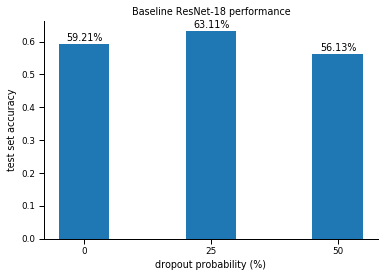

In [4]:
data = df[(df.gan == 0) & (df.aug == 0) & (df.neurons == 0)]

sns.set_context('paper')

n = data['drop'].values
y = data.acc.values

ax = plt.subplot(111)
ax.bar(n, y, width=10)

ax.set_xticks([0, 25, 50])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

for i in range(3):
    ax.text(n[i] - 3.5, y[i] + 0.01, '{:.2f}%'.format(y[i]*100))
    
ax.set_xlabel('dropout probability (%)')
ax.set_ylabel('test set accuracy')

ax.set_title('Baseline ResNet-18 performance')

#plt.savefig('figures/i.png', bbox_inches='tight')

## II. Traditional augmentation

c:\users\thano\appdata\local\programs\python\python36\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'ResNet-18 performance with traditional data augmentation')

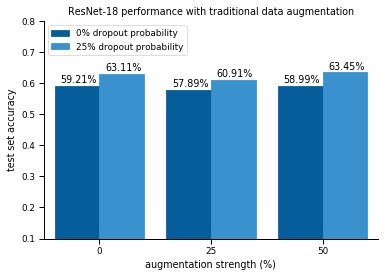

In [5]:
cp = sns.color_palette()
dark_blue  = [min(1, max(0, x - 0.10)) for x in cp[0]]
light_blue = [min(1, max(0, x + 0.10)) for x in cp[0]]


data = df[(df.gan == 0) & (df['drop'] < 50) & (df.neurons == 0)].sort_values(by=['aug'])

n = data[data['drop'] == 0].aug.values
y = data[data['drop'] == 0].acc.values[[0,1,3]]

ax = plt.subplot(111)
for i in range(3):
    ax.text(i-0.35, y[i] + 0.01, '{:.2f}%'.format(y[i]*100))

n = data[data['drop'] == 25].aug.values
y = data[data['drop'] == 25].acc.values

for i in range(3):
    ax.text(i + 0.05, y[i] + 0.01, '{:.2f}%'.format(y[i]*100))


sns.set_context('paper')

data['drop'] = data['drop'].apply(lambda x: '{}% dropout probability'.format(x))
data = data.sort_values(by=['drop']).sort_values(by=['aug'])

ax = sns.barplot(x='aug', y='acc', data=data, hue='drop', ax=ax)

for p in ax.patches[:3]:
    p.set_color(dark_blue)
    
for p in ax.patches[3:]:
    p.set_color(light_blue)

#ax.set_xticks([0, 25, 50])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.legend(loc='upper left')#bbox_to_anchor=(1.005, 1))
ax.set_ylim([0.1, 0.8])

ax.set_xlabel('augmentation strength (%)')
ax.set_ylabel('test set accuracy')

ax.set_title('ResNet-18 performance with traditional data augmentation')

#plt.savefig('figures/ii.png', bbox_inches='tight')

## III. GAN augmentation

The following plot is not used in the paper

(-1, 7)

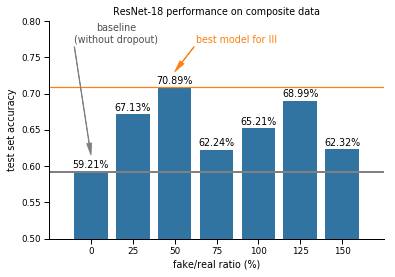

In [6]:
sns.set_context('paper')

data = df[(df.aug == 0) & (df.neurons == 0) & (df['drop'] < 25)].sort_values(by=['gan'])

ax = sns.barplot(x='gan', y='acc', data=data, hue='drop')

baseline_color = '0.5'
best_color = cp[1]#'C4'

ax.plot([-2, 8], [0.5921, 0.5921], c=baseline_color, lw=2)
ax.annotate('baseline\n(without dropout)', (0, 0.615), (0.6, 0.77), color='0.3', 
             arrowprops=dict(color=baseline_color, width=0.5, headwidth=5),
             horizontalalignment='center')

#plt.text(-1.6, 0.6, 'baseline: 0.5921', color='0.5')

ax.plot([-2, 8], [0.7089, 0.7089], c=best_color)

ax.annotate('best model for III', (2, 0.73), (2.5, 0.77), color=best_color,
             arrowprops=dict(color=best_color, width=0.5, headwidth=5),
             horizontalalignment='left')



ax.set_ylim([0.5, 0.8])
ax.legend().set_visible(False)

n = data[data['drop'] == 0].gan.values
y = data[data['drop'] == 0].acc.values

for i in range(7):
    ax.text(i, y[i] + 0.005, '{:.2f}%'.format(y[i]*100), horizontalalignment='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('fake/real ratio (%)')
ax.set_ylabel('test set accuracy')

ax.set_title('ResNet-18 performance on composite data')

ax.set_xlim([-1, 7])

#ax.patches[0].set_color(baseline_color)
#ax.patches[2].set_color(best_color)

#plt.savefig('figures/iii.png', bbox_inches='tight')

Instead, we selected to use the figure below.

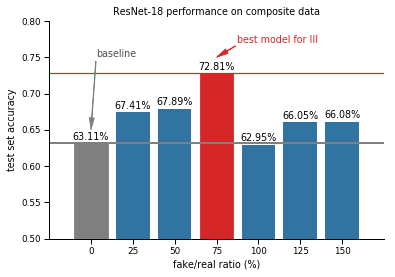

In [7]:
sns.set_context('paper')

data = df.drop(8)
data = data[(data.aug == 0) & (data.neurons == 0) & (data['drop'] == 25)].sort_values(by=['gan'])

ax = sns.barplot(x='gan', y='acc', data=data, hue='drop')

baseline_color = '0.5'
best_color = cp[3]#'C4'

ax.plot([-2, 8], [0.6311, 0.6311], c=baseline_color, lw=2)
ax.annotate('baseline', (0, 0.65), (0.6, 0.75), color='0.3', 
             arrowprops=dict(color=baseline_color, width=0.5, headwidth=5),
             horizontalalignment='center')

#plt.text(-1.6, 0.6, 'baseline: 0.5921', color='0.5')

ax.plot([-2, 8], [0.7281, 0.7281], c=best_color)

ax.annotate('best model for III', (3, 0.75), (3.5, 0.77), color=best_color,
             arrowprops=dict(color=best_color, width=0.5, headwidth=5),
             horizontalalignment='left')



ax.set_ylim([0.5, 0.8])
ax.legend().set_visible(False)

n = data[data['drop'] == 25].gan.values
y = data[data['drop'] == 25].acc.values

for i in range(7):
    ax.text(i, y[i] + 0.005, '{:.2f}%'.format(y[i]*100), horizontalalignment='center')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('fake/real ratio (%)')
ax.set_ylabel('test set accuracy')

ax.set_title('ResNet-18 performance on composite data')

ax.set_xlim([-1, 7])

ax.patches[0].set_color(baseline_color)
ax.patches[3].set_color(best_color)

plt.savefig('figures/iii.png', bbox_inches='tight')

## IV. Both types of augmentation

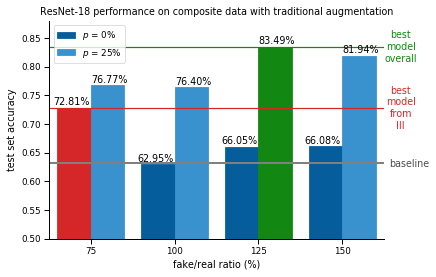

In [8]:
sns.set_context('paper')

data = df.drop(8)
data = data[(data.neurons == 0) & (data['drop'] == 25) & (data['gan'] > 50)].sort_values(by=['aug']).sort_values(by=['gan'])

ax = plt.subplot(111)

n = [-0.23, 0.22, 0.77, 1.22, 1.77, 2.22, 2.77, 3.22]
y1 = data[data['aug'] == 0].acc.values
y2 = data[data['aug'] == 25].acc.values
y = [y1[0], y2[0], y1[1], y2[1], y1[2], y2[2], y1[3], y2[3]]

for i in range(8):
    ax.text(n[i], y[i] + 0.005, '{:.2f}%'.format(y[i]*100), horizontalalignment='center')

#data['aug'] = data['aug'].apply(lambda x: '{}% augmentation probability'.format(x))
data['aug'] = data['aug'].apply(lambda x: '$p$ = {}%'.format(x))

ax = sns.barplot(x='gan', y='acc', data=data, hue='aug', ax=ax)

for p in ax.patches[:4]:
    p.set_color(dark_blue)
    
for p in ax.patches[4:]:
    p.set_color(light_blue)

ax.plot([-1, 4], [0.6311, 0.6311], c=baseline_color, lw=2)
ax.text(3.8, 0.6311, s='baseline', color='0.3',
        horizontalalignment='center', verticalalignment='center')

ax.plot([-1, 4], [0.7281, 0.7281], c=best_color)
ax.text(3.7, 0.7281, s='best\nmodel\nfrom\nIII', color=best_color,
        horizontalalignment='center', verticalalignment='center')

best_overall = cp[2]#'C2'
best_overall = [min(1, max(0, x - 0.10)) for x in best_overall]

ax.plot([-1, 4], [0.8349, 0.8349], c=best_overall)
ax.text(3.7, 0.8349, s='best\nmodel\noverall', color=best_overall,
       horizontalalignment='center', verticalalignment='center')

ax.legend(loc='upper left')

ax.patches[6].set_color(best_overall)
ax.patches[0].set_color(best_color)

ax.set_xlim([-0.5, 3.5])
ax.set_ylim([0.5, 0.88])

#ax.legend(loc='upper left')
    
#ax.legend().set_visible(False)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

ax.set_xlabel('fake/real ratio (%)')
ax.set_ylabel('test set accuracy')

ax.set_title('ResNet-18 performance on composite data with traditional augmentation')


plt.savefig('figures/iv.png', bbox_inches='tight')

## Comparing the four experiments

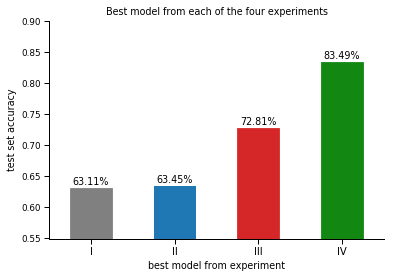

In [9]:
sns.set_context('paper')

labels = ['best model\nfrom I',
          'best model\nfrom II',
          'best model\nfrom III',
          'best model\nfrom IV']

labels = ['I', 'II', 'III', 'IV']

vals = [0.6311, 0.6345, 0.7281, 0.8349]

ax = plt.subplot(111)

ax.bar(labels, vals, width=0.5)
ax.set_ylim([0.55, 0.9])
ax.set_xlim([-0.5, 3.5])

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


#ax.plot([-1, 4], [0.6311, 0.6311], c=baseline_color, lw=2)
#ax.text(-0.9, 0.637, s='baseline', color='0.3',)
#ax.text(3.3, 0.637, s='baseline', color='0.3',)


#ax.plot([-1, 4], [0.8349, 0.8349], c=cp[2])
#ax.text(-0.9, 0.84, s='best model overall', color=cp[2])
#ax.text(1, 0.84, s='best model overall', color=cp[2])


for i in range(4):
    ax.text(i, vals[i] + 0.005, '{:.2f}%'.format(vals[i]*100), horizontalalignment='center')

    
ax.patches[0].set_color(baseline_color)
ax.patches[2].set_color(best_color)
ax.patches[3].set_color(best_overall)

ax.set_xlabel('best model from experiment')
ax.set_ylabel('test set accuracy')

for l in ax.get_xticklabels():
    l.set_fontsize(10)

ax.set_title('Best model from each of the four experiments')

plt.savefig('figures/comparative.png', bbox_inches='tight')